<a href="https://colab.research.google.com/github/swaroop-raj/machine-learning/blob/main/Pima%20Indian%20women.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by 
"National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us 
to perform this prediction.

Constraints on data collection
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage


This dataset describes the medical records for Pima Indians
and whether or not each patient will have an onset of diabetes within ve years.

# Fields description follow:

preg = Number of times pregnant

plas = Plasma glucose concentration a 2 hours in an oral glucose tolerance test

pres = Diastolic blood pressure (mm Hg)

skin = Triceps skin fold thickness (mm)

test = 2-Hour serum insulin (mu U/ml)

mass = Body mass index (weight in kg/(height in m)^2)

pedi = Diabetes pedigree function

age = Age (years)

class = Class variable (1:tested positive for diabetes, 0: tested negative for diabetes)

# Dataset:
https://www.kaggle.com/kumargh/pimaindiansdiabetescsv

# 1. Import Libraries and load dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
from os import system

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number 
of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma 
separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What 
information is available about the data.

# 2. Print 10 samples from the dataset

In [ ]:
data = pd.read_csv("/content/pima-indians-diabetes (1).csv");
data.head(10)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# 3. Print the datatypes of each column and the shape of the dataset

In [ ]:
print(data.shape);
print(data.nunique());

(768, 9)
Preg      17
Plas     136
Pres      47
skin      51
test     186
mass     248
pedi     517
age       52
class      2
dtype: int64


In [ ]:
data.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Preg    768 non-null    int64  
 1   Plas    768 non-null    int64  
 2   Pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
print(data.isnull().sum());
data[data[:] == 0 ].count()


Preg     0
Plas     0
Pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64


Preg     111
Plas       5
Pres      35
skin     227
test     374
mass      11
pedi       0
age        0
class    500
dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


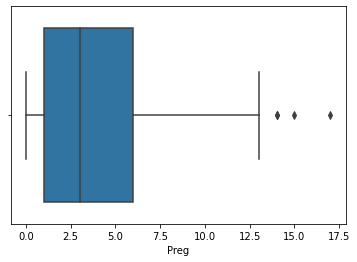

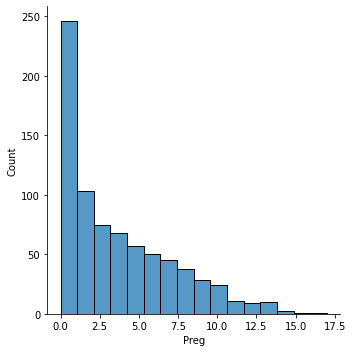

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


AxesSubplot(0.125,0.125;0.775x0.755)


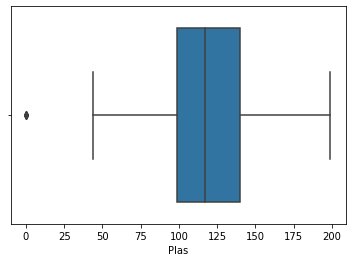

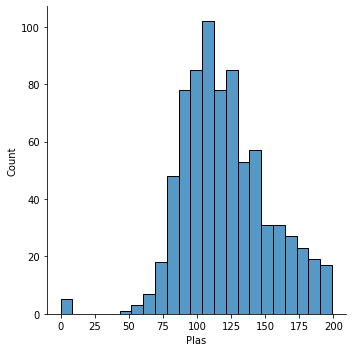

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


AxesSubplot(0.125,0.125;0.775x0.755)


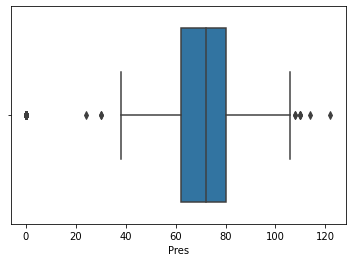

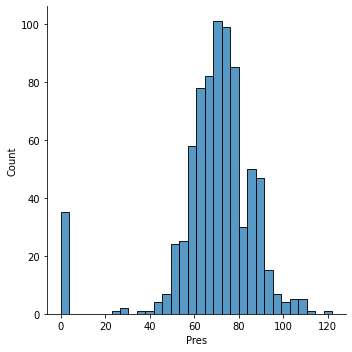

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


AxesSubplot(0.125,0.125;0.775x0.755)


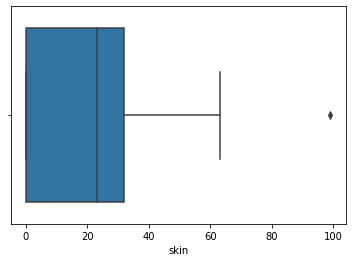

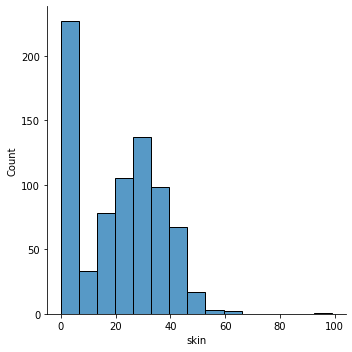

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


AxesSubplot(0.125,0.125;0.775x0.755)


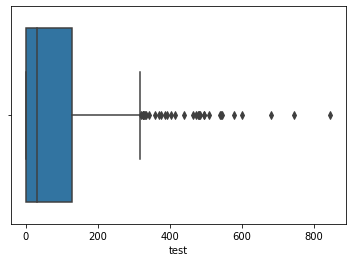

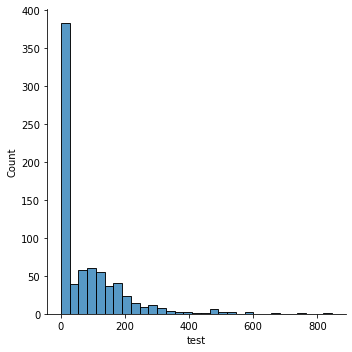

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


AxesSubplot(0.125,0.125;0.775x0.755)


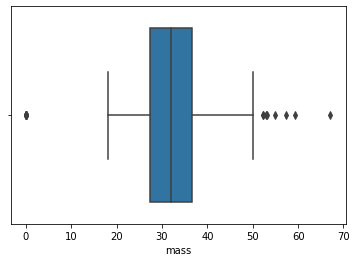

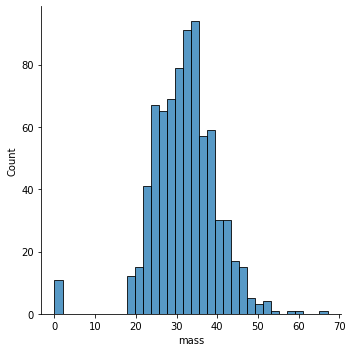

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


AxesSubplot(0.125,0.125;0.775x0.755)


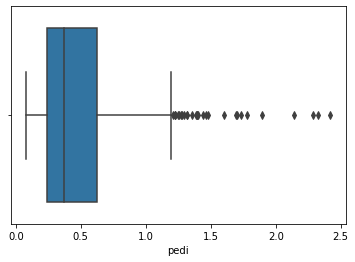

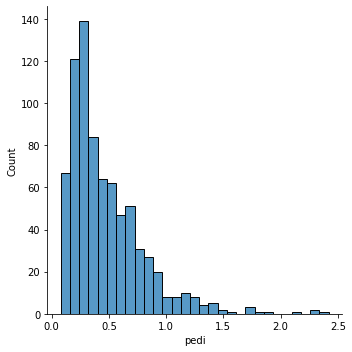

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


AxesSubplot(0.125,0.125;0.775x0.755)


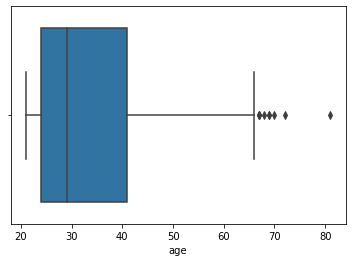

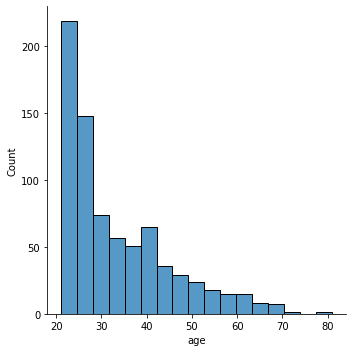

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


AxesSubplot(0.125,0.125;0.775x0.755)


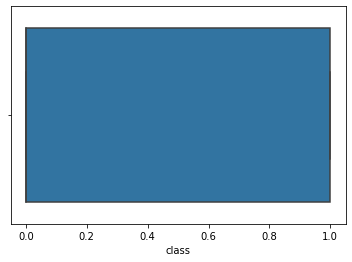

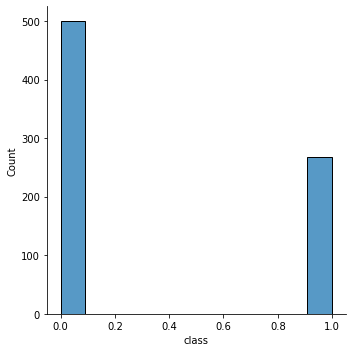

In [ ]:
for col in data.columns :
  print(sns.boxplot(data[col]));
  print(sns.displot(data[col]));
  plt.show()

There are '0's in the data. Are they really valid '0's or they are missing values? Plasma, BP, skin thickness etc. these values 
cannot be 0. look at column by column logically to understand this.

In [ ]:
cdata = data.copy()
cdata.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# 4. Replace all the 0s in the column with the median of the same column value accordingly.

In [ ]:
for col in cdata.columns :
  if(col != "class") :
    cdata = cdata.replace({ col : {0:cdata[col].median()}})
cdata.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6.0,148.0,72.0,35.0,30.5,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,30.5,26.6,0.351,31,0
2,8.0,183.0,64.0,23.0,30.5,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,3.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


# 5. Print the descriptive statistics of each & every column using describe() function

In [ ]:
cdata.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.278646,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.021516,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# 6. See the distribution of 'Class' variable and plot it using appropriate graph

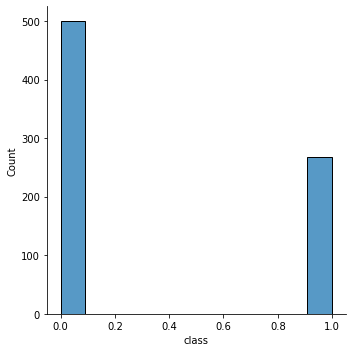

In [ ]:
sns.displot(cdata['class'])
plt.show()

# 7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables

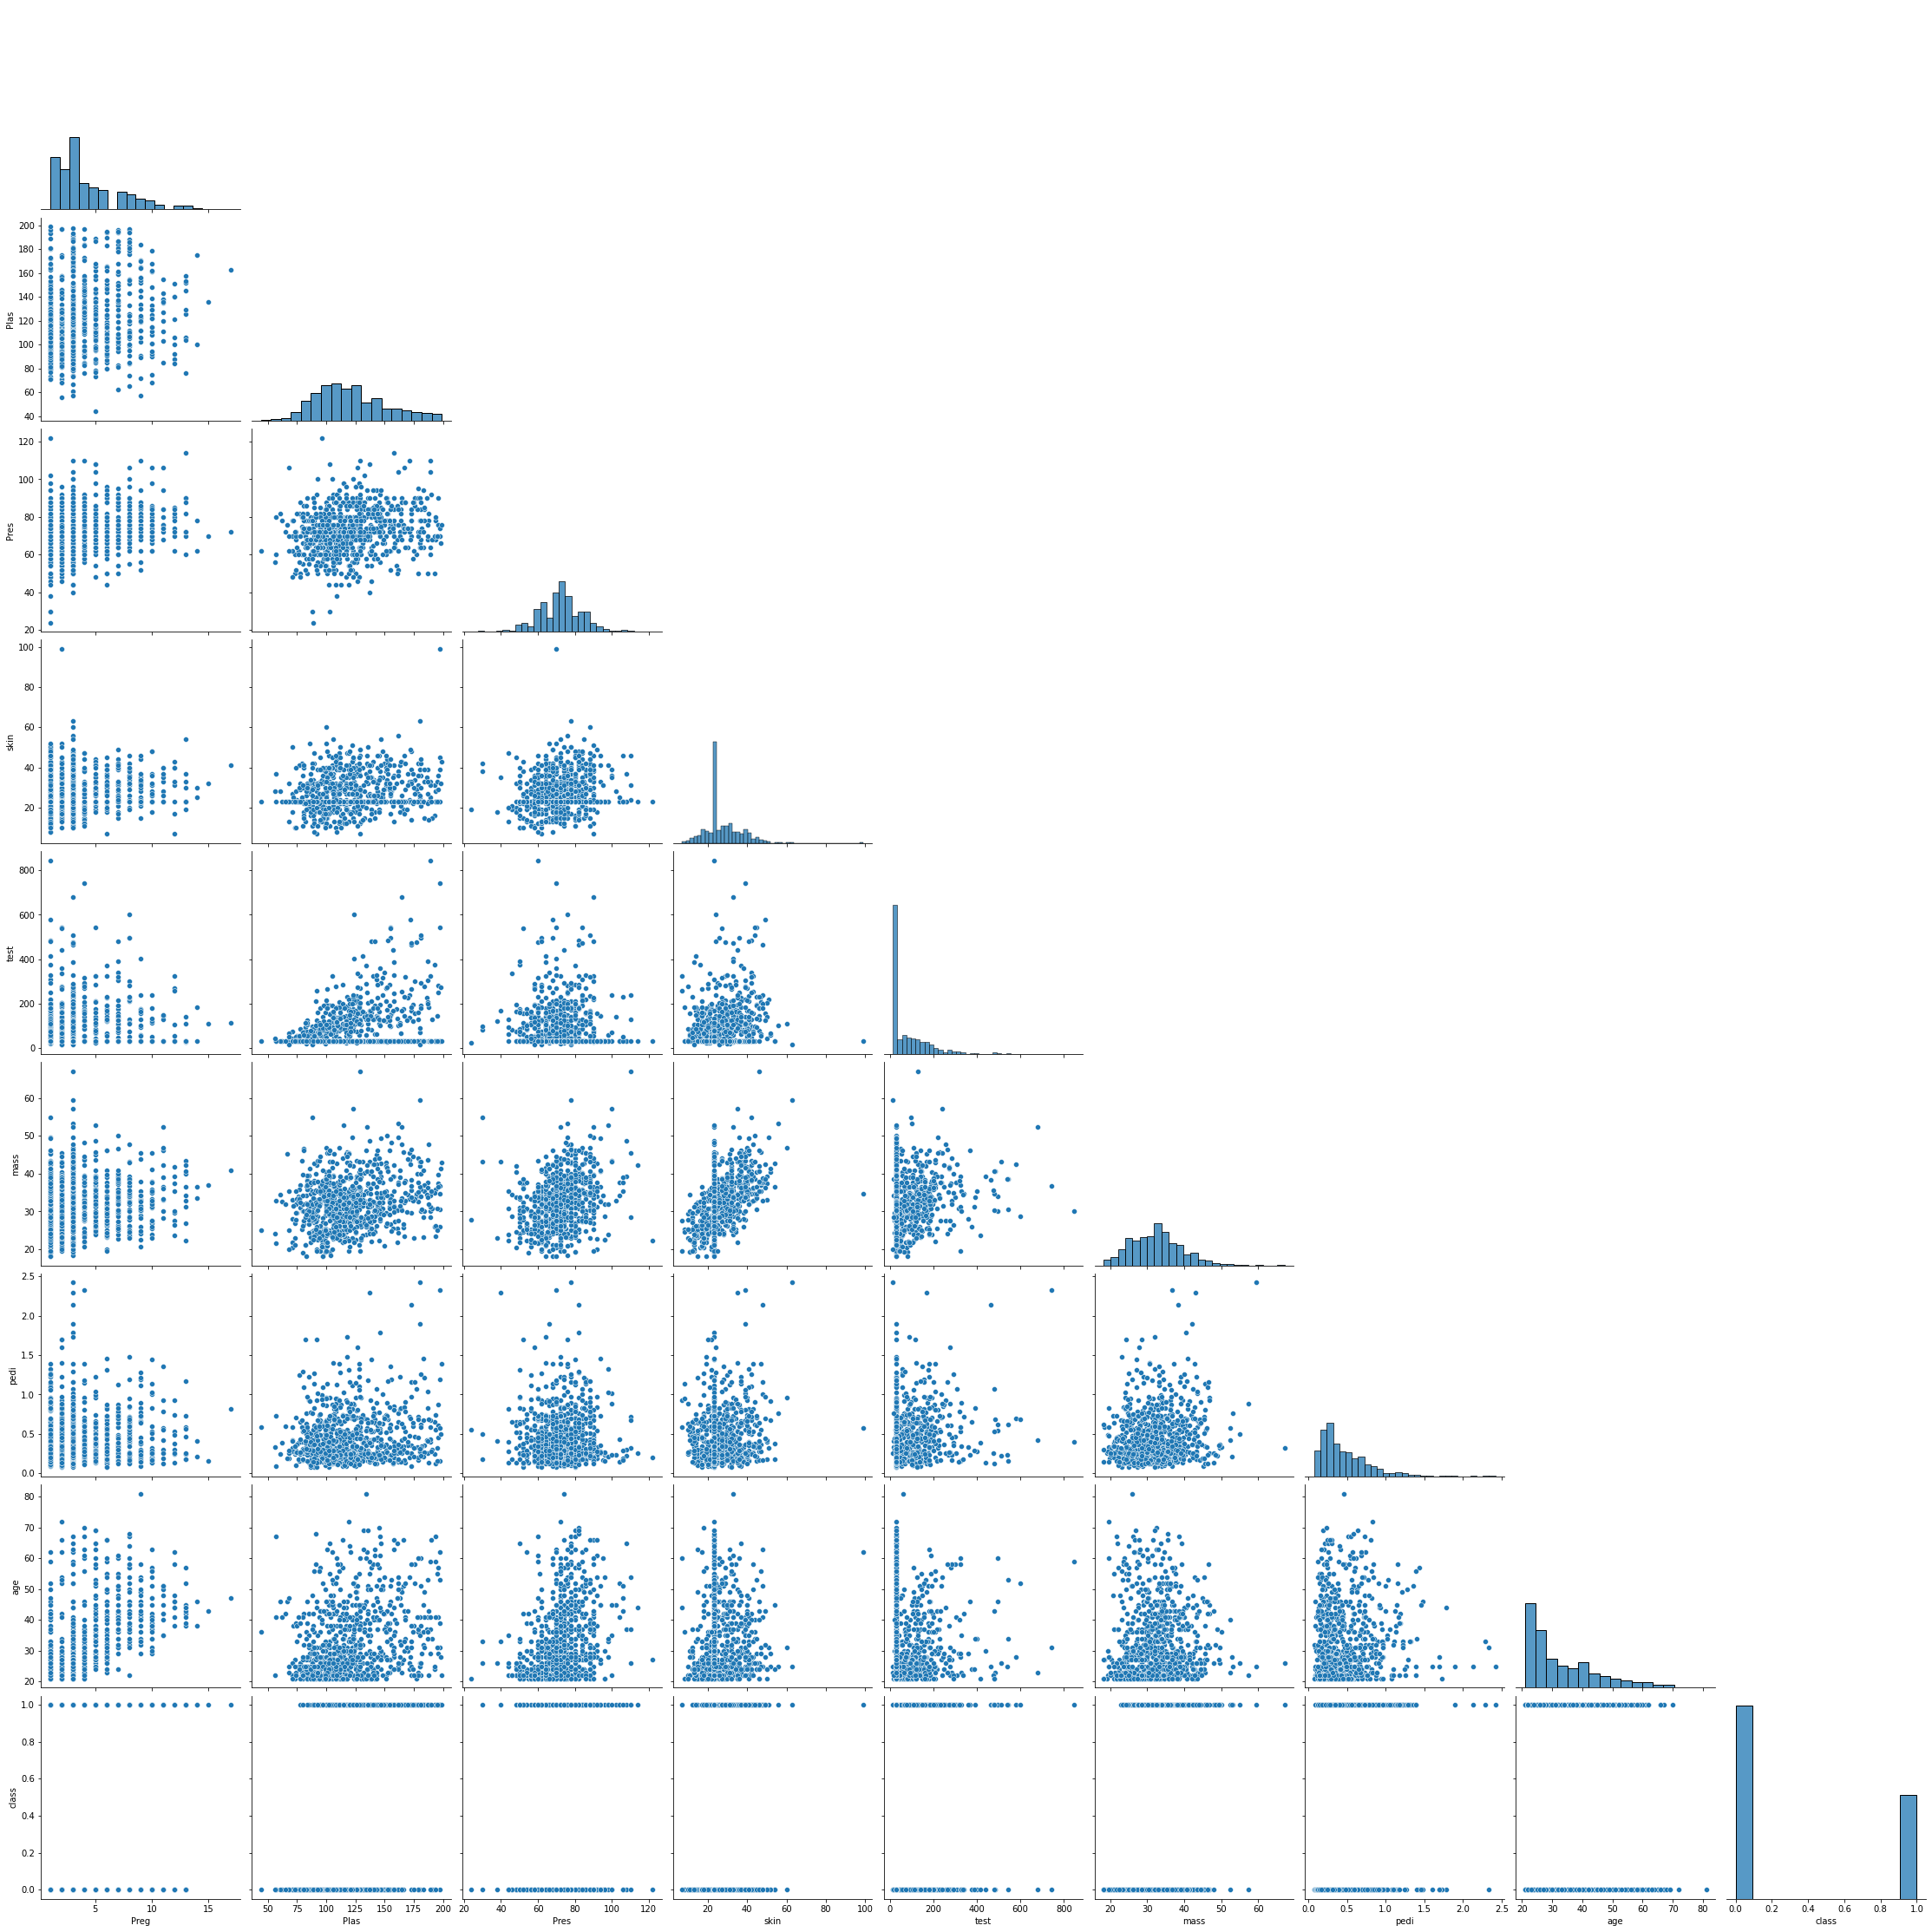

In [ ]:
sns.pairplot(cdata , corner=True, height=3.5)
plt.show()

In [ ]:
cdata.corr()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
Preg,1.000000,0.149326,0.247530,0.060706,-0.059580,0.080540,-0.016151,0.538169,0.245466
Plas,0.149326,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909,0.492782
Pres,0.247530,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915,0.165723
skin,0.060706,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514,0.189065
test,-0.059580,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413,0.148457
mass,0.080540,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744,0.312249
pedi,-0.016151,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561,0.173844
age,0.538169,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000,0.238356
class,0.245466,0.492782,0.165723,0.189065,0.148457,0.312249,0.173844,0.238356,1.000000


In [ ]:
cdata.corr()[cdata.corr()[:] > 0.8].count()

Preg     1
Plas     1
Pres     1
skin     1
test     1
mass     1
pedi     1
age      1
class    1
dtype: int64

In [ ]:
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

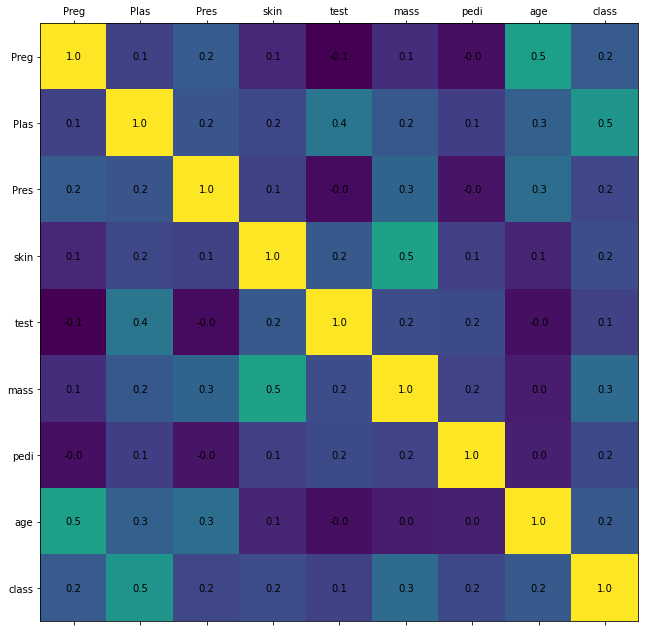

In [ ]:
plot_corr(cdata)
plt.show()

Check for correlation between variables whose values are >0.8

# 8. Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).

In [ ]:
x = cdata.drop('class' , axis=1)
y = cdata['class']
print(x.head())
print(y.head())
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30,random_state=1)

   Preg   Plas  Pres  skin   test  mass   pedi  age
0   6.0  148.0  72.0  35.0   30.5  33.6  0.627   50
1   1.0   85.0  66.0  29.0   30.5  26.6  0.351   31
2   8.0  183.0  64.0  23.0   30.5  23.3  0.672   32
3   1.0   89.0  66.0  23.0   94.0  28.1  0.167   21
4   3.0  137.0  40.0  35.0  168.0  43.1  2.288   33
0    1
1    0
2    1
3    0
4    1
Name: class, dtype: int64


# 9. Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.

In [ ]:
treeClassifier = DecisionTreeClassifier(criterion= 'entropy', max_depth=4, random_state=1 )
treeClassifier.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

# 10. Print the accuracy of the model & print the confusion matrix

In [ ]:
print("Training score " , treeClassifier.score(x_train , y_train))
print("Test score " , treeClassifier.score(x_test , y_test))

Training score  0.7839851024208566
Test score  0.7792207792207793


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
pred = treeClassifier.predict(x_test)
pred_comb = x_test.copy()
pred_comb['actual class'] = y_test
pred_comb['predicted class'] = pred
pred_comb[(pred_comb['actual class'] != pred_comb['predicted class'])]

,Preg,Plas,Pres,skin,test,mass,pedi,age,actual class,predicted class
101,1.0,151.0,60.0,23.0,30.5,26.1,0.179,22,0,1
756,7.0,137.0,90.0,41.0,30.5,32.0,0.391,39,0,1
341,1.0,95.0,74.0,21.0,73.0,25.9,0.673,36,0,1
19,1.0,115.0,70.0,30.0,96.0,34.6,0.529,32,1,0
493,4.0,125.0,70.0,18.0,122.0,28.9,1.144,45,1,0
218,5.0,85.0,74.0,22.0,30.5,29.0,1.224,32,1,0
667,10.0,111.0,70.0,27.0,30.5,27.5,0.141,40,1,0
628,5.0,128.0,80.0,23.0,30.5,34.6,0.144,45,0,1
750,4.0,136.0,70.0,23.0,30.5,31.2,1.182,22,1,0
577,2.0,118.0,80.0,23.0,30.5,42.9,0.693,21,1,0


In [ ]:
print("Trainig accuracy",treeClassifier.score(x_train,y_train))  
print()
print("Testing accuracy",treeClassifier.score(x_test, y_test))
print()
print("Recall:",recall_score(y_test,pred))
print()
print("Precision:",precision_score(y_test,pred))
print()
print("F1 Score:",f1_score(y_test,pred))
print()
print("Roc Auc Score:",roc_auc_score(y_test,pred))

Trainig accuracy 0.7839851024208566

Testing accuracy 0.7792207792207793

Recall: 0.611764705882353

Precision: 0.7428571428571429

F1 Score: 0.6709677419354839

Roc Auc Score: 0.7442385173247381


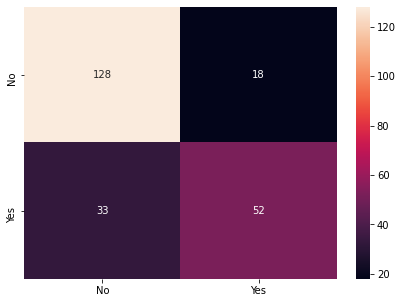

In [ ]:
cm=metrics.confusion_matrix(y_test, pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

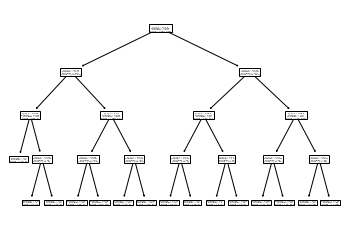

In [ ]:
from sklearn import tree
tree.plot_tree(treeClassifier)
plt.show()
